# Сборный проект 1

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## 1. Обзор данных

Для начала изучим имеющиеся у нас данные

In [ ]:
#импортируем библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head(10)#выведем первые 10 строк на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
df.info()#посмотрим общую информацию по таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.isna().sum()#найдем пропуски

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
df['User_Score'].value_counts(dropna=False)#найдем уникальные значения столбца user_score

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
9.6       2
0.9       2
0.3       2
0         1
9.7       1
Name: User_Score, Length: 97, dtype: int64

<div class="alert alert-warning">
<b>Комментарий 👉</b>

value_counts по умолчанию не "считает" NaN'ы. Попробуй передать в value_counts() параметр dropna=False ... мне кажется будет чуть нагляднее и более верным будет понимание что за значения в колонке находятся.</div>


In [ ]:
df.duplicated().sum()#проверим на дубликаты. их нет

0

<div class="alert alert-warning">
<b>Предложение 👉</b>

При анализе дубликатов полезно использовать параметр subset. В нашем примере можно попробовать поискать дубликаты для пары "Имя - Консоль".</div>


### Вывод 1.

Мы получили таблицу, в которой 11 столбцов и 16 714 строк. В данных есть пропуски, нарушения стиля в названиях столбцов, неверные типы данных, странное обозначение tbd в User_Score. Займемся предобработкой данных.

## 2. Предобработка данных

Для начала переименуем названия столбцов

In [ ]:
df.columns#выведем все названия столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
#переведем все названия столбцов в нижный регистр
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
#df.columns = map(str.lower, df.columns)
#df

найдем долю пропусков в столбце "год выпуска"

In [ ]:
print('Доля пропусков: {:.2%}'.format(df['year_of_release'].isna().mean()))

Доля пропусков: 1.61%


Поскольку для исследовательского анализа нам нужны будут данные по годам, строки без года неинформативны, поэтому удалим их. Названия игр и жанры тоже важны для нас, поэтому удалим пропуски и в этих столбцах, их всего по 2 в каждом.

In [ ]:
df.dropna(subset = ['year_of_release', 'genre', 'name'], inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Да, всего 2 записи (из 16 тысяч) с пропусками в жанрах и названиях (плюс в этих же записях нет ни оценок пользователей, ни оценок критиков, ни рейтингов) и 269 записей (менее 2% из 16+ тысяч) с пропусками в годах выпуска. Можно удалять даже не раздумывая …

Хотя конечно, единого сценария нет на самом деле. С одной стороны - да, говорят, что "данных много не бывает", удалять записи из-за пропусков, когда датасет измеряется сотнями-тысячами записей ой как не хочется.

С другой стороны, если запись не спасти, если в ней несколько полей не заполнено или не заполнены ключевые поля, и ты чувствуешь, что заполнение их медианами/средними приведёт к смещению статистик - надо удалять. Да, можно поставить "заглушку", но тогда надо отдавать отчёт, что во всем последующем коде про эту "заглушку" помнить придётся. Т.е. перед построением всех графиков, гистограмм заглушку надо будет удалить. Перед расчетом корреляций - заглушку надо будет удалить. Перед проверкой гипотез заглушку надо будет удалить.

Я бы так определил способ решения такой задачи: если записи с пропусками в ключевых для моего анализа полях составляют 1-3-5-до 10% строк, то я бы их из оригинального датафрейма вырезал (но сохранил бы в некий df, к которому при необходимости мог бы обратиться).

А вообще, в таких случаях, когда нужно решить - заполнять пропуски или удалять строки с ними из df - всегда ищи эксперта в предметной области и советуйся с ним. Как правило это человек из бизнеса, который значит суть бизнес-процесса и вот именно он даст тебе точный и аргументированный совет - что в данной, конкретной задаче делать с "битыми" полями в строках датафрейма.</div>


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Перед удалением, операцией по сути деструктивной, я бы рекомендовал посмотреть на записи с пропусками в соответствующих колонках, по отдельности. 2 строки с пропусками в 'name' (из 16+ тысяч) - это капля в море, можно удалить наверное и сразу ... 269 записей с пропусками в годе выпуска тоже вроде немного, но ты учитывай тот факт, что все задачи в это проекте так или иначе связаны как раз с годом выпуска ... В общем лишний взгляд на данные лишним не будет.</div>


<div class="alert alert-warning">
<b>Комментарий 👉</b>

И ещё небольшой, но жизненный совет: **перед** и **сразу после** удаления строк (и для столбцов тоже будет верно) примени метод .shape к датафрейму. В этом случае наглядно будет видно сколько строк/столбцов было удалено. В некоторых ситуациях может быть ошибка в коде из-за которой удаляется больше чем ожидалось. На этот способ поможет тебе такую проблему сразу вычислить.</div>


Переведем столбец "год выпуска" в целочисленный тип.

In [ ]:
df['year_of_release'] = df['year_of_release'].astype(int)

Найдем долю пропусков в critic_score, user_score, rating

In [ ]:
print('Доля пропусков в critic_score: {:.2%}'.format(df['critic_score'].isna().mean()))

Доля пропусков в critic_score: 51.45%


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Это хорошо! "Отображение" пропусков в процентах воспринимается проще и нагляднее, чем в абсолютных единицах.</div>


Пропусков достаточно много. Заменять их медианой -- значить исказить данные. Заполним их значением "-1", а затем будем строить графики по срезам с положительными значениями. Также переведем тип данных в целочисленный, поскольку нигде нет значений после запятой.

In [ ]:
df['critic_score'] = df['critic_score'].fillna(-1).astype(int)

In [ ]:
print('Доля пропусков в user_score: {:.2%}'.format(df['user_score'].isna().mean()))

Доля пропусков в user_score: 40.17%


Здесь тоже много пропусков. Поступим по аналогии с critic_score и заполним пропуски на "-1". Как мы видели в первом разделе, здесь много значений tbd, что значит "to be determined". Вряд ли эти значения когда-то будут определены, поэтому будем относиться к ним как к пропускам и тоже заменим на "-1".

In [ ]:
df['user_score'] = df['user_score'].fillna(-1)

In [ ]:
df = df.replace({'user_score':{'tbd':-1}})

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Один из ключевых моментов этого проекта: ты пропуски в 2 столбцах с оценками ('critic_score' и 'user_score') заполняешь как -1. Это ОК здесь. Но дальше, когда мы будем строить корреляции, а также возможно оценивать платформы в зависимости от оценок (пользователей / экспертов) - надо будет вспомнить этот момент (как ты собственно выше и говоришь, что "будем строить графики по срезам с положительными значениями") ... Если не вспомнишь и не обработаешь, то дальше скорее всего будет ошибка в результатах анализа, в графиках и в твоих выводах.

Отметь этот момент - возможно нам придется вернуться сюда.</div>


In [ ]:
#переведем тип данных из object в float
df['user_score'] = df['user_score'].astype(float)

In [ ]:
print('Доля пропусков в rating: {:.2%}'.format(df['rating'].isna().mean()))

Доля пропусков в rating: 40.60%


Доля пропусков в столбце "рейтинг" достаточно велика, этот столбец на понадобится для анализа, поэтому заменим пропуски на значение "не доступно".

In [ ]:
df['rating'] = df['rating'].fillna('не доступно')

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Ты приняла верное решение, когда решила не оставлять в поле рейтинга пустые значение, а также заменить их на 0. Далее, когда ты будешь анализировать особенности регионов в зависимости от рейтинга ESRB, то увидишь, что если бы они остались NaN, то на графиках их не было бы видно, также такие игры "выпали" бы из выводов, а это красная ошибка в этом проекте.</div>


In [ ]:
df.shape

(16444, 11)

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Не имеет особого смысла выводить датафрейм без .head(). Если делаешь это для того, чтобы размерность data была на экране, то "красивее" было бы наверное использовать .shape в отдельной ячейке.</div>


In [ ]:
df.isna().sum()#проверим на наличие пропусков

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [ ]:
df['user_score'].value_counts()#tbd заменились на -1

-1.0    8981
 7.8     322
 8.0     285
 8.2     276
 8.3     252
        ... 
 0.7       2
 0.2       2
 1.0       2
 9.7       1
 0.0       1
Name: user_score, Length: 96, dtype: int64

### Вывод 2.

В этом разделе мы произвели предобработку данных:
- перевели названия столбцов в нижний регистр;
- удалили пропуски в стобцах year_of_release', 'genre', 'name';
- перевели столбец "год выпуска" в целочисленный тип, а "рейтинг пользователей" в тип float;
- нашли долю пропусков в critic_score, user_score, rating;
- заменили пропуски critic_score, user_score на "-1", "tbd" в user_score также заменили на "-1". В столбце с рейтингом пропупуски заменили на "не доступно".

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Данные загружены, отлично.

Хорошо, что применяешь метод .head()/.sample() таким образом в память не будет загружен весь датасет, объем которого может быть огромным.

Методы .info, .describe, .value_counts(), .unique() как правило часто встречаются и обязательны к применению в задачах по исследованию данных, ведь с их помощью можно получить первые инсайты. 

Молодец, что провела предварительный анализ данных, проверила данные на наличие пропусков и затем обработала их (аргументированно заполнила/удалила) теперь можно приступать и к EDA (== Exploratory Data Analysis).</div>


## 3. Исследовательский анализ данных

#### Шаг 3.1 Посмотрим, сколько игр выпускалось в разные годы и выясним, важны ли данные за все периоды.


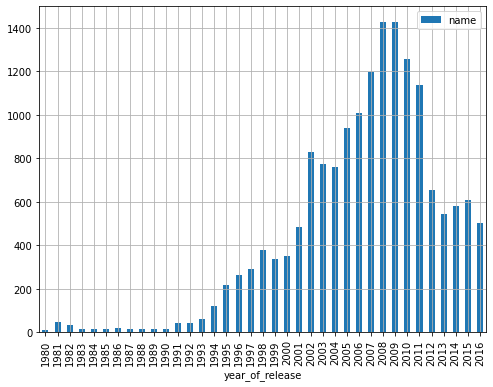

In [ ]:
df_year = df.pivot_table(index='year_of_release', values=['name'], 
                                  aggfunc='count').plot.bar(figsize=(8, 6), 
                                                             grid=True)

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Этот график, как и все прочие ниже, выиграли бы если бы были подписаны сами, а также оси X и Y, а также указаны единицы измерения по осям.</div>


Больше всего игр выпускалось в 2008 и 2009 годах. В период до 1995 года выходило очень мало игр. Поэтому важны даннные после этого периода.

#### Шаг 3.2 Посмотрим, как менялись продажи по платформам. 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [ ]:
#создадим столбец с суммарными продажами
df['all_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Ещё такой вариант суммирования есть (просто как альтернатива … псевдокод): data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns') и также "присвоить" результат новому столбцу в data.</div>


In [ ]:
df


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,не доступно,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,не доступно,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,не доступно,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,не доступно,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,не доступно,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,не доступно,0.01


In [ ]:
#найдем платформы с наибольшими суммарным продажам
platform_sales = df.pivot_table(
    index ='platform',
    values ='all_sales', 
    aggfunc ='sum').sort_values(
    by='all_sales', 
    ascending=False).reset_index().head(7)#выведем топ-7 платформ
platform_sales

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14


In [ ]:
#сделаем список с топ-7 платформами
top = list(platform_sales['platform'])
top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

In [ ]:
#создадим таблицу с топ-7 платформами по продажам
platform_sales_top = platform_sales.query('platform in @top').reset_index(drop=True)
platform_sales_top

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Елена, а не проще было **platform_sales_top** сделать сразу из **platform_sales**, просто "отрезав" первые 7 строк? Т.е. минуя создание списка **top**, а затем выполнения **query('platform in @top')** ...</div>

In [ ]:
#отфильтруем наш датафрем для топ-7 платформ
df_top7 = df[df['platform'].isin(platform_sales_top['platform'])]
df_top7

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,-1,-1.0,не доступно,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,-1,-1.0,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1,-1.0,не доступно,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,не доступно,0.01


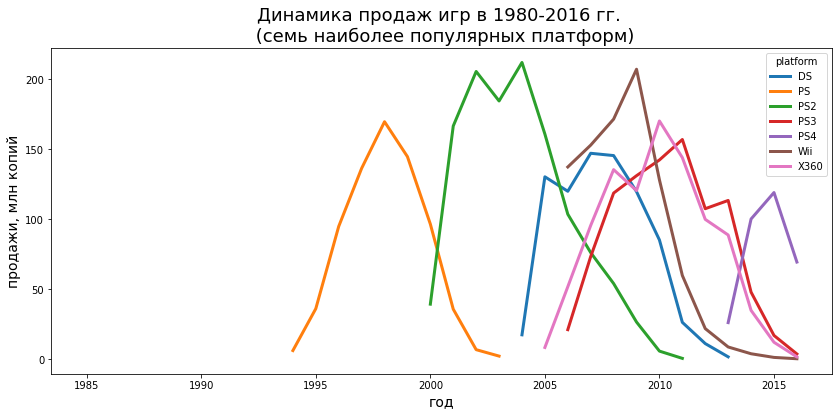

In [ ]:
#сгруппируем данные по платформе, году выпуска и суммарным продажам и построим графики
df_top7.groupby(['year_of_release', 'platform'])['all_sales'].sum().unstack().plot(
    linewidth=3, figsize=(14, 6));
plt.title('Динамика продаж игр в 1980-2016 гг. \n (семь наиболее популярных платформ)', fontsize=18);
plt.xlabel('год', fontsize=14)
plt.ylabel('продажи, млн копий', fontsize=14);

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

О, а вот теперь супер: график подписан, оси подписаны. Молодец!</div>

In [ ]:
#sales_by_year_by_platform = df.pivot_table(index='year_of_release', values='all_sales', columns='platform', aggfunc='sum').plot(figsize=(14, 6), 
                                                             #grid=True)

In [ ]:
#найдем жизненный цикл платформ
lifespans = (df_top7.groupby('platform')['year_of_release'].max()-
             df_top7.groupby('platform')['year_of_release'].min()).reset_index()
lifespans.rename (columns={'year_of_release': 'lifespan'}, inplace=-True)
lifespans.sort_values(by='lifespan', ascending=False).head(7)

,platform,lifespan
0,DS,28
2,PS2,11
6,X360,11
3,PS3,10
5,Wii,10
1,PS,9
4,PS4,3


В основном платформы имеют 10-11-летний жизненный цикл. Платформа DS выглядит аномалией на их фоне. Взглянем на нее поближе.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Подтверждаю 7-9-11 лет, как корректный интервал, описывающий средний срок жизни игровой платформы.</div>


In [ ]:
#отсортируем эту платформу по году выпуска
df[df['platform'] == 'DS'].sort_values (by='year_of_release').head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.0,0.02,0.0,-1,-1.0,не доступно,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.0,0.00,0.0,-1,-1.0,E,0.04


Платформа DS появилась на рынке в 2004 году, значит игра Strongest Tokyo University Shogi DS не имеет к ней отношения. Избавимся от нее.

In [ ]:
df.drop(df[df['name']=='Strongest Tokyo University Shogi DS'].index, inplace=True)

In [ ]:
#построим очищенный датасет
df_top7_clean = df[df['platform'].isin(platform_sales_top['platform'])]


In [ ]:
#еще раз найдем жизненный цикл, теперь уже без аномалии
lifespans_clean = (df_top7_clean.groupby('platform')['year_of_release'].max()-
             df_top7_clean.groupby('platform')['year_of_release'].min()).reset_index()
lifespans_clean.rename(columns={'year_of_release': 'lifespan'}, inplace=True)
lifespans_clean.sort_values(by='lifespan', ascending=False).head(7)

,platform,lifespan
2,PS2,11
6,X360,11
3,PS3,10
5,Wii,10
0,DS,9
1,PS,9
4,PS4,3


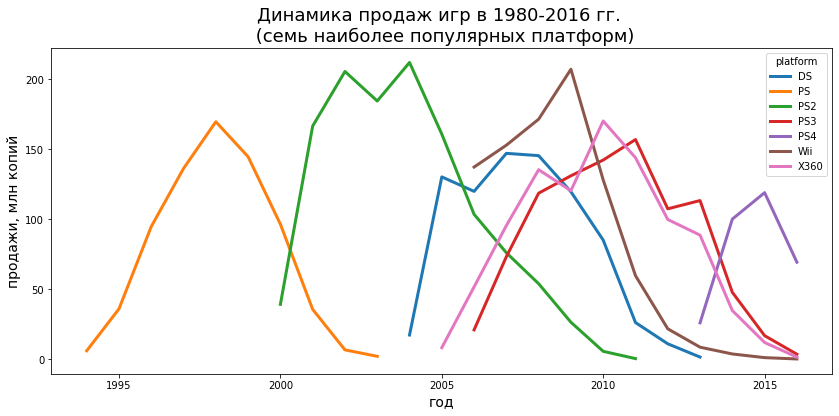

In [ ]:
#снова построим графики
df_top7_clean.groupby(['year_of_release', 'platform'])['all_sales'].sum().unstack().plot(
    linewidth=3, figsize=(14, 6));
plt.title('Динамика продаж игр в 1980-2016 гг. \n (семь наиболее популярных платформ)', fontsize=18);
plt.xlabel('год', fontsize=14)
plt.ylabel('продажи, млн копий', fontsize=14);

Из наших вычислений и на графике видно, что средняя жизнь платформы - 10 лет. PS4 выбивается из этой картины, с продолжительнотью 3 года, но это новая платформа, ее жизненный цикл еще не окончен. Для нашего анализа нам нужно выбрать актуальный период, который поможет построить прогноз на 2017 год. Взглянем поближе на данные за 2010-2016 годы.

In [ ]:
df_recent_years = df_top7_clean.query('year_of_release >= 2010')

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Очень хорошо, что результат запроса ты присваиваешь новому датафрейму. Таким образом оригинальный датафрейм ты оставляешь нетронутым, не перезаписываешь (вдруг нам опять понадобятся данные из него чуть ниже). Это верное решение. Best practice. Молодец!</div>


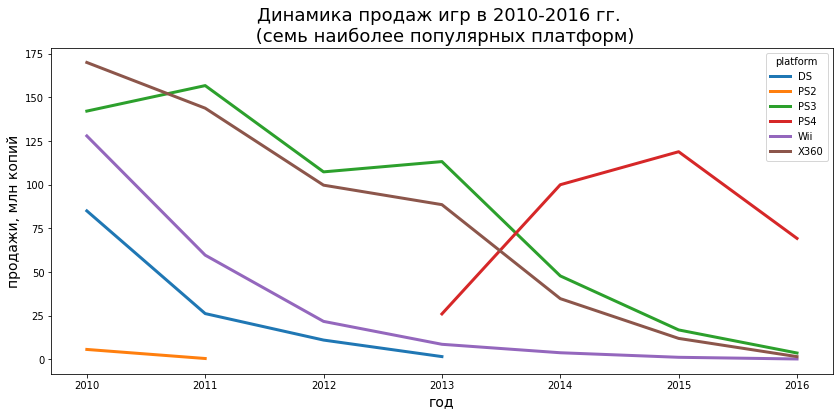

In [ ]:
df_recent_years.groupby(['year_of_release', 'platform'])['all_sales'].sum().unstack().plot(
    linewidth=3, figsize=(14, 6));
plt.title('Динамика продаж игр в 2010-2016 гг. \n (семь наиболее популярных платформ)', fontsize=18);
plt.xlabel('год', fontsize=14)
plt.ylabel('продажи, млн копий', fontsize=14);

Здесь видно, что основные популярные платформы завершают свой жизненный цикл: одни имеют некоторые пики активности (PS3 и X360), другие явно просели в продажах (Wii, DS, PS2). Только одна платформа PS4 начала свой жизненный цикл в 2013 году и достигла пика в 2015. Для построения прогноза на 2017 год думаю будет достаточно периода 2014-2016, поскольку эти годы с одной стороны самые недавние, с другой -- на них достаточно видны очевидные тренды -- угасание одних платформ и появление других.

In [ ]:
df_final = df_top7_clean.query('year_of_release >= 2014')


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Правильный выбор диапазона!

Это на самом деле один из подводных камней этого проекта! 
Студенты могут выбирать для анализа очень большой интервал данных, но для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. В нашем случае (я с тобой согласен) думаю, что 3 года: 2014 - 2015 + неполный 2016 - ОК.</div>


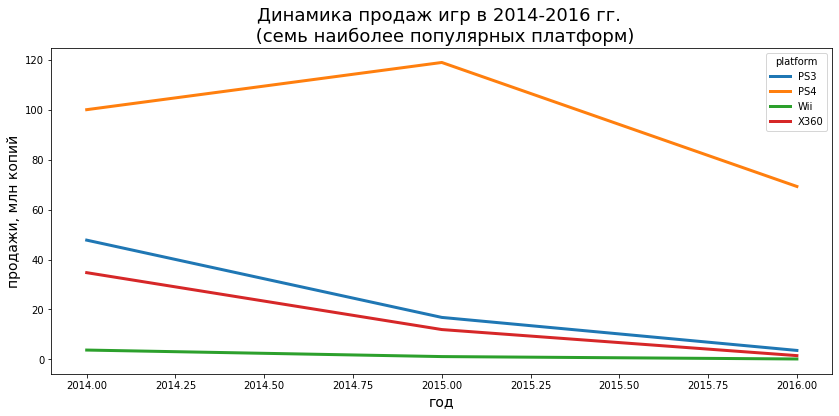

In [ ]:
df_final.groupby(['year_of_release', 'platform'])['all_sales'].sum().unstack().plot(
    linewidth=3, figsize=(14, 6));
plt.title('Динамика продаж игр в 2014-2016 гг. \n (семь наиболее популярных платформ)', fontsize=18);
plt.xlabel('год', fontsize=14)
plt.ylabel('продажи, млн копий', fontsize=14);

В этот период видно, что у Wii стабильно низкие продажи. PS3 и X360 имея продажи около 40-50 млн копий в 2014 в два раза снизили свои продажи к 2015 и стремятся к нулю к 2016. PS4 -- самая перспективная платформа из всех представленных с более чем 110 млн копий в 2015.

#### Шаг 3.3 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.


In [ ]:
df_boxplot = [df_final[df_final['platform'] == 'PS3']['all_sales'],
              df_final[df_final['platform'] == 'PS4']['all_sales'],
              df_final[df_final['platform'] == 'Wii']['all_sales'],
              df_final[df_final['platform'] == 'X360']['all_sales']]

'''df_final.boxplot(column='all_sales', by='platform')
df_final.boxplot(column='all_sales', by='platform', showfliers=False)'''

"df_final.boxplot(column='all_sales', by='platform')\ndf_final.boxplot(column='all_sales', by='platform', showfliers=False)"

Text(0, 0.5, 'млн.копий')

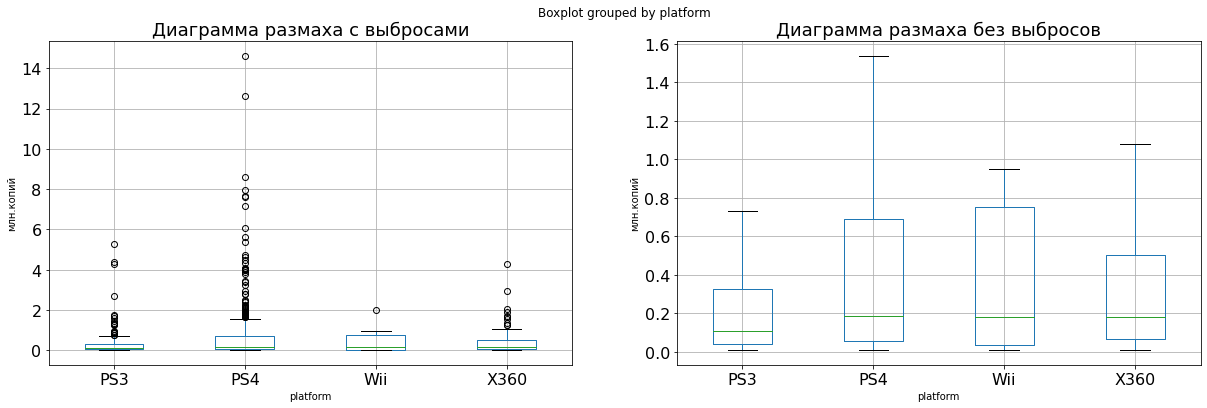

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))#1 ряд, 2 диаграммы

df_final.boxplot(column='all_sales', by='platform', ax=ax1, fontsize=16)
ax1.set_title('Диаграмма размаха с выбросами', fontsize=18)
ax1.set_ylabel('млн.копий')

#диаграмма размаха без выбросов
df_final.boxplot(column='all_sales', by='platform', showfliers=False, ax=ax2, fontsize=16)
ax2.set_title('Диаграмма размаха без выбросов', fontsize=18)
ax2.set_ylabel('млн.копий')

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Это хорошо! Часто студенты рисуют только график с боксплотами, на которых видны выбросы, а сами "ящики" сплющиваются так, что квартилей не разобрать. Бывает ситуация, когда наоборот, только "ящики" видно детально, но непонятно какие выбросы по платформам. И очень редка ситуация, когда рисуют и тот график и другой, предоставляя всю, полную информацию (с разных перспектив), необходимую для полного анализа. Молодец!</div>

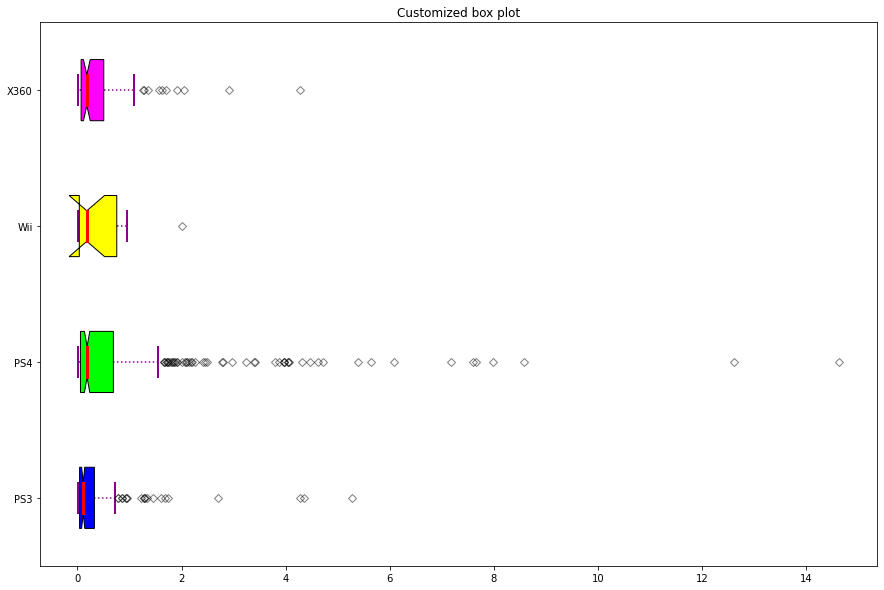

In [ ]:
#диаграмма размаха в цвете

fig = plt.figure(figsize =(15, 10))
ax = fig.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(df_boxplot, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

#x-axis labels    
ax.set_yticklabels(['PS3', 'PS4',
                    'Wii', 'X360'])

# Adding title
plt.title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()


<div class="alert alert-warning">
<b>Комментарий 👉</b>

К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 25ый и 75ый квартили. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Этого можно добиться, например, задав параметр хlim

То есть, я бы предложил после этого графика ещё один построить, в котором бы сами "ящики" были лучше видны. На том, что выше выбросы их фактически "забили". Попробуй использовать в параметре хlim, значение, которое ещё больше ограничит значение по OХ "сверху" (например, хlim(0, 0.85).

Ну а в твоем случае, из-за того, что на графике не разобрать квартили - для точного сравнения "ящиков" мы вынуждены будем использовать describe().</div>


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Елена - посмотри в сторону графической библиотеки seaborn. Сейчас она один из неформальных лидеров в области визуализации данных (вместе с plotly). В чем её преимущество по сравнению с Матплотлиб спросишь ты? Я бы сразу ответил - в немногословности. Посмотри мой код ниже - аналогичные "ящики с усами" в цвете она делает гораздо проще и лаконичнее.</div>

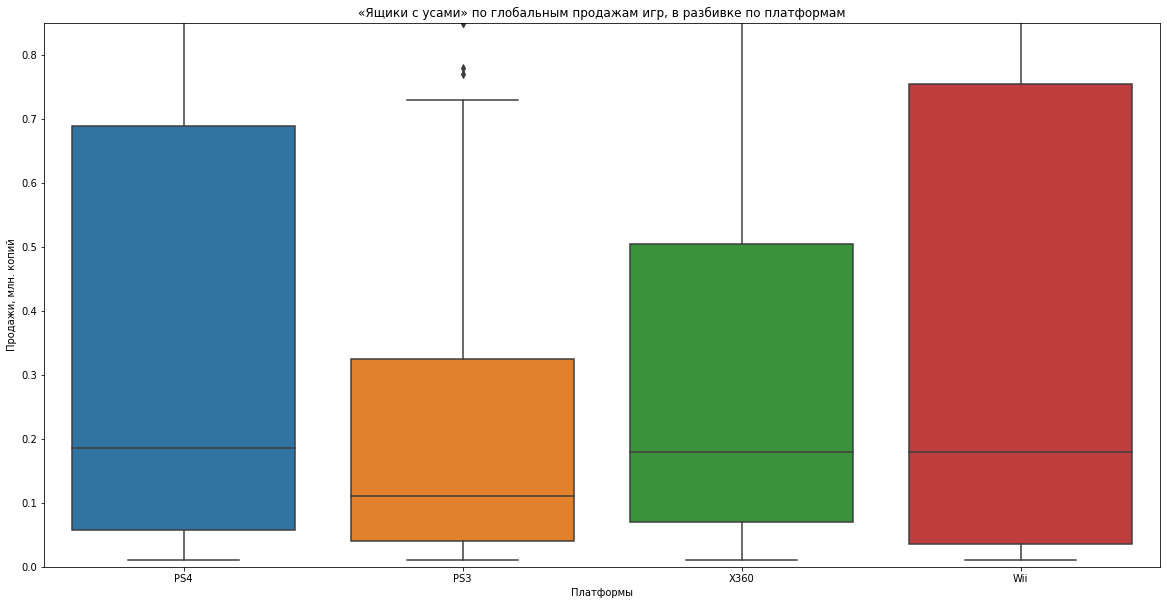

In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 10))

sns.boxplot(data=df_final, x='platform', y='all_sales')

plt.ylim(0, 0.85)

plt.xlabel('Платформы')
plt.ylabel('Продажи, млн. копий')
plt.title('«Ящики с усами» по глобальным продажам игр, в разбивке по платформам')

plt.show()

In [ ]:
# df_final['platform'].unique()
# df_wii = df_final.query('platform == "Wii"')
# print(df_wii['user_score'].value_counts())
# print(df_wii['critic_score'].value_counts())

-1.0    9
 8.4    1
 4.3    1
Name: user_score, dtype: int64
-1    11
Name: critic_score, dtype: int64


По диаграммам размаха видно, что медианные продажи для всех платформ составляют ок. 200 тыс. копий в год (кроме PS3, которая завершает свой жизненный цикл). Выбросы говорят о небольшом количестве игр с очень большими продажами, которые и определяют лидирующую позицию этих платформ на рынке. Особенно много таких успешных игр у PS4.

#### Шаг 3.4 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

array([[<AxesSubplot:xlabel='all_sales', ylabel='all_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='all_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='all_sales'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

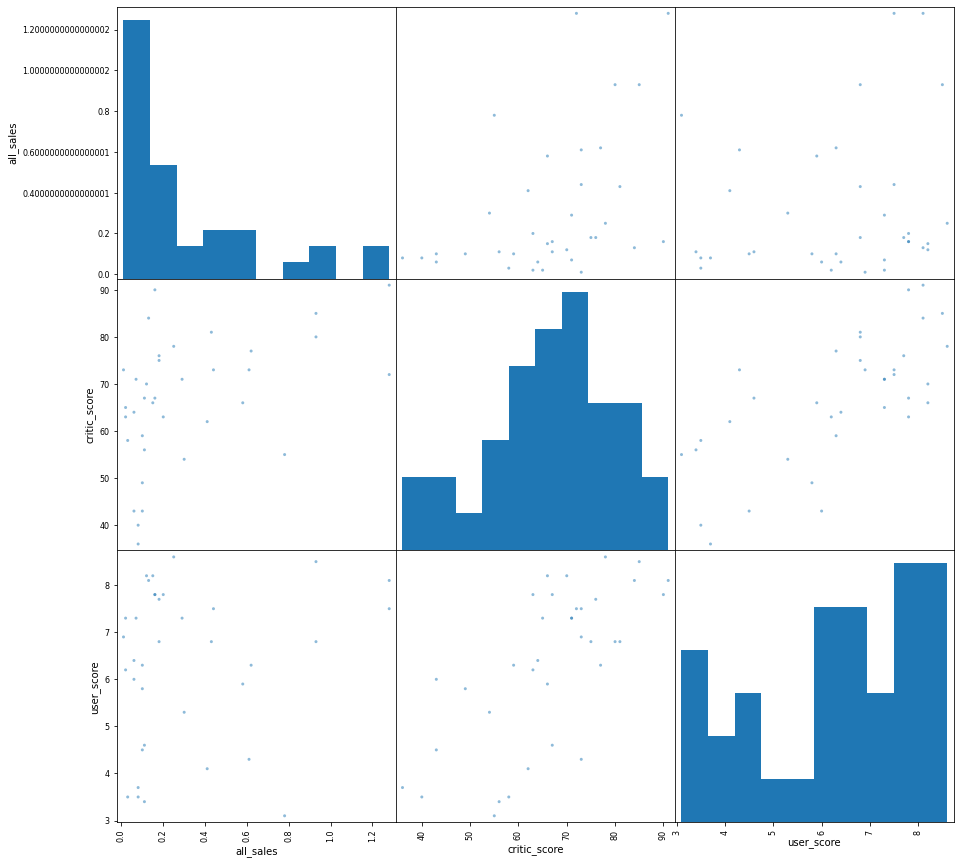

In [ ]:
#построим диаграмму рассеяния для платформы PS3
df_final_ps3 = df_final[df_final['platform'] == 'PS3']#отсортируем df_final по платформе
df_ps3 = df_final_ps3.query('critic_score != -1 and user_score != -1')#отсортируем по значениям не равным -1
df_ps3_matrix = df_ps3[['all_sales', 'critic_score', 'user_score']]#построим диаграмму рассеяния
pd.plotting.scatter_matrix(df_ps3_matrix, figsize=(15, 15))

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Молодец! Используя (user_score != -1) and (critic_score != -1) ты даешь мне понять, что не забыл, то, что заполнял пропуски "минус единичкой" в оценках критиков и пользователей. Очень грамотно!</div>


In [ ]:
#найдем коэффициент корреляции для всех пар столбцов
df_ps3_matrix.corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.446575,0.156595
critic_score,0.446575,1.000000,0.693445
user_score,0.156595,0.693445,1.000000


По диаграмме и значениям коэффициента корреляции видно, что связи между оценками пользователей продажами игр практически нет. Коэф. корреляции низкий - 0.15. В то время, как связь между продажами и оценками экспертов для всех платформ является прямой, средней степени выраженности (коэффициент 0,44).

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Елена, формулировать, что коэффициент (линейной) корреляции (Пирсона) между 2 переменными (в нашем случае между "total_sales" и "critic_score") "это влияние чего-то на что-то" - неверно. 
    
Коэффициент свидетельствует **о наличии или отсутствии** связи между переменными, и **измеряет выраженность** этой связи. Другими словами, коэффициент корреляции - это инструмент, с помощью которого можно проверить гипотезу о зависимости и измерить силу **линейной** зависимости двух переменных.
    
Например, в нашем случае, связь между продажами и оценками экспертов для всех платформ является **прямой, средней** степени выраженности (коэффициент 0,44).</div>


#### Шаг 3.5 Найдем коэффициенты корреляции по продажам игр и отзывам для остальных платформ, кроме PS3.


In [ ]:
df_platforms = df_final.query('critic_score != -1 \
                              and user_score != -1 \
                              and platform != "PS3"')
df_platforms_matrix = df_platforms[['all_sales', 'critic_score', 'user_score']]
df_platforms_matrix.corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.399038,-0.015340
critic_score,0.399038,1.000000,0.567938
user_score,-0.015340,0.567938,1.000000


<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

По условию задачи надо сравнить результаты PS3 (то, что сделано выше) с результатами на других консолях. Но ты берешь всю таблицу, со всеми прочими консолями, в том числе и с PS3. Это не соответствует условию. Рассмотри пару консолей **отдельно друг от друга**. Выводы, сделанные на основе расчетов по нескольким платформам, выглядят "весомей" и убедительней.</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Спасибо, исправила ...</font>
</div>

In [ ]:
df_platforms['platform'].unique()

array(['PS4', 'X360'], dtype=object)

По остальным топ-платформам (а убрав PS3, у нас остались только две платформы: PS4 и Х360) коэффициенты корреляции немного отличаются от одной PS3. Здесь видно, что связь между оценками пользователей и продажами еще меньше. Коэф.корреляции незначительный -- -0.01, что говорит о низкой степени выраженности. Коэф.корреляции для оценки критиков -- 0.39. Это значение чуть меньше, чем для одной платформы PS3, т.е связь  между продажами и оценками экспертов для всех платформ является прямой, средней степени выраженности.

#### Шаг 3.6 Посмотрим на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
#найдем количество значений для каждого жанра
df_final['genre'].value_counts()

Action          260
Sports           98
Role-Playing     85
Shooter          67
Adventure        61
Misc             41
Fighting         39
Racing           34
Platform         14
Simulation       10
Strategy          6
Puzzle            2
Name: genre, dtype: int64

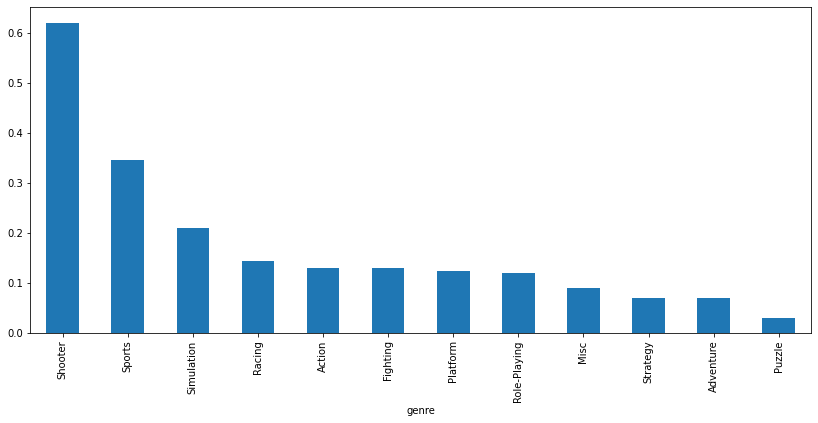

In [ ]:
#построим график зависимости медианных продаж от жанра
df_final.groupby('genre')['all_sales'].median().sort_values(ascending=False).plot.bar(figsize=(14, 6));

По графику видно, что самые прибыльные -- это игры с жанрами Shooter, Sports и Simulation. 

<div class="alert alert-success">
<b>ОК 👍</b>

Елена, отлично что ты понимаешь, что общие продажи - это не очень корректная метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние (или медианные продажи), что собственно ты и делаешь!</div>


### Вывод 3.

В этом разделе:
 - мы изучили, сколько игр выпускалось за разные годы и выяснили, что больше всего игр выпускалось в 2008 и 2009 годах. В период до 1995 года выходило очень мало игр. 
 - изучили, как менялись продажи по платформам. Выбрали топ-7 платформ с наибольшими суммарными продажами и построили распределение по годам. Выяснили, что средняя жизнь платформы - 10 лет. Выбрали актуальный период 2014-2016 годы.
 - построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Выяснили, что медианные продажи для всех платформ составляют ок. 200 тыс. копий в год (кроме PS3, жизненный цикл которой завершается). Выбросы говорят о небольшом количестве игр с очень большими продажами, которые и определяют лидирующие позицию этих платформ на рынке. Особенно много таких успешных игр у PS4.
 - посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами и выяснили, что связи между оценками пользователей и продажами игр практически нет. Коэф. корреляции низкий - 0.15. В то время, как связь между продажами и оценками экспертов для всех платформ является прямой, средней степени выраженности (коэффициент 0,44).
 - нашли коэффициенты корреляции по продажам игр и отзывам на других платформах, кроме PS3 и обнаружили, что по остальным 3 топ-платформам коэффициенты корреляции немного отличаются от одной PS3. Здесь видно, что связь между оценками пользователей и продажами еще меньше. Коэф.корреляции незначительный -- -0.01, что говорит о низкой степени выраженности. Коэф.корреляции для оценки критиков -- 0.39. Это значение чуть меньше, чем для одной платформы PS3, т.е связь  между продажами и оценками экспертов для всех платформ является прямой, средней степени выраженности. 
 - посмотрели на общее распределение игр по жанрам и нашли, что самые прибыльные -- это игры с жанрами Shooter, Sports и Simulation.


## 4. Портрет пользователя каждого региона


#### 4.1 Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).



In [ ]:
#сгруппируем данные по платформе и суммарным продажам по каждому региону
na_platform = df_final.groupby('platform')['na_sales'].sum()
eu_platform = df_final.groupby('platform')['eu_sales'].sum()
jp_platform = df_final.groupby('platform')['jp_sales'].sum()


Text(0.5, 0.98, 'Топ-4 платформы по числу проданных игр в 2014-2016 гг.')

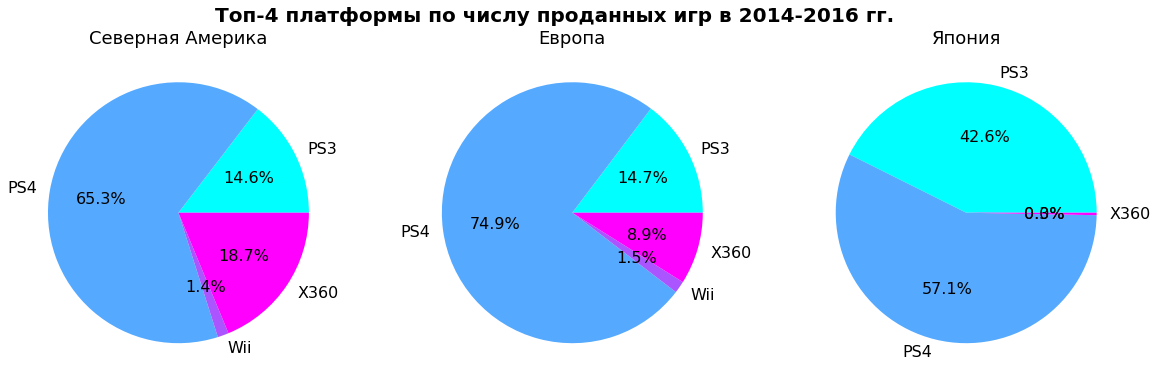

In [ ]:
#построим круговые диаграммы для каждого региона.
#в наш топ попали всего 4 платформы, поэтому строить диаграммы будем для четырех, а не для пяти.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))#1 ряд, 3 диаграммы

na_platform.plot(kind='pie', ax=ax1, subplots=True, autopct='%1.1f%%', fontsize=16, cmap='cool')
ax1.set_title('Северная Америка', fontsize=18)
ax1.set_ylabel('')

eu_platform.plot(kind='pie', ax=ax2, subplots=True, autopct='%1.1f%%', fontsize=16, cmap='cool')
ax2.set_title('Европа', fontsize=18)
ax2.set_ylabel('')

jp_platform.plot(kind='pie', ax=ax3, subplots=True, autopct='%1.1f%%', fontsize=16, cmap='cool')
ax3.set_title('Япония', fontsize=18)
ax3.set_ylabel('')

plt.suptitle('Топ-4 платформы по числу проданных игр в 2014-2016 гг.', fontsize=20, fontweight='bold')

Самая популярная платформа для всех регионов - PS4. На нее приходятся 65%, 75% и 57% продаж в каждом регионе соответственно. Это понятно, ведь предыдущий анализ показал, что эта платформа самая новая, а потому самая перспективная из всех. X360  более популярна в Америке, чем в Европе, она занимает 18% и 9% в этих регионах соответственно. В Японии игр этой платформы продается ничтожно мало - меньше 0.1%. На PS3 приходится примерно равное количество продаж в Америке и Европе (ок. 15%), а вот в Японии эта платформа на втором месте по популярности после PS4. Wii занимает ничтожную долю рынка в Америке и Европе, в то время, как в Японии она не представлена вовсе.

#### 4.2 Определим самые популярные жанры (топ-5). 


In [ ]:
#сгруппируем данные по жанру и продажам, отсортируем так, чтобы получить топ-5 значений
genres_na = df_final.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
genres_eu = df_final.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
genres_jp = df_final.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

Text(0.5, 0.98, 'Топ-5 жанров по числу проданных игр в 2014-2016 гг.')

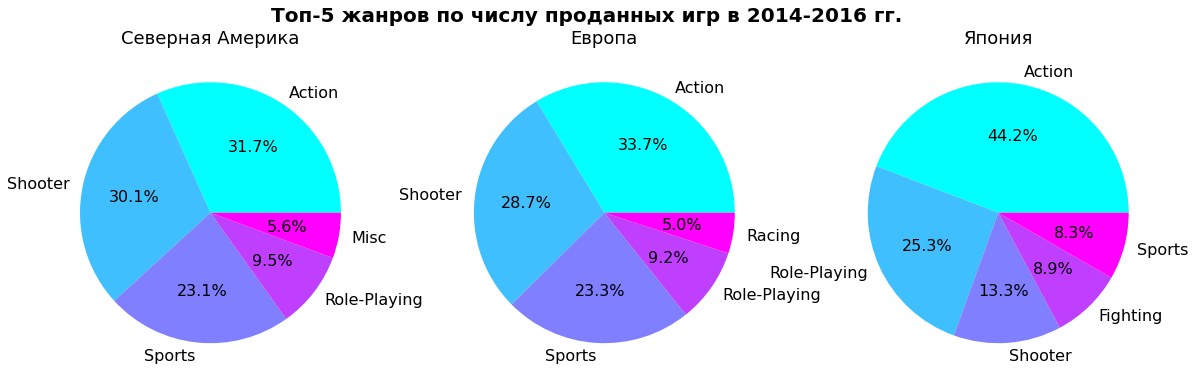

In [ ]:
#построим круговые диаграммы для каждого региона
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))#1 ряд, 3 диаграммы

genres_na.plot(kind='pie', ax=ax1, subplots=True, autopct='%1.1f%%', fontsize=16, cmap='cool')
ax1.set_title('Северная Америка', fontsize=18)
ax1.set_ylabel('')

genres_eu.plot(kind='pie', ax=ax2, subplots=True, autopct='%1.1f%%', fontsize=16, cmap='cool')
ax2.set_title('Европа', fontsize=18)
ax2.set_ylabel('')

genres_jp.plot(kind='pie', ax=ax3, subplots=True, autopct='%1.1f%%', fontsize=16, cmap='cool')
ax3.set_title('Япония', fontsize=18)
ax3.set_ylabel('')

plt.suptitle('Топ-5 жанров по числу проданных игр в 2014-2016 гг.', fontsize=20, fontweight='bold')

Вкусы североамериканских и европейских игроков довольно похожи. Приблизительно одинаковые доли для этих регионов приходятся на жанры (в порядке убывания) Action, Shooter, Sports и Role-Playing. Пятое место в Европе занимает Racing, тогда как в Америке этого жанра нет в топ-5. Здесь на последнем месте игры с жанрами, не вошедшими в другие категории. У японцев вкусы заметно отличаются от американских и европейских: не первом месте здесь тоже Action, как и в других двух регионах, а второе место занимает Role-Playing c 25%, тогда как в Америке и Европе этот жанр занимает лишь 4-е место. На 3-м Shooter с 13%, на 4-м Fighting, жанр вообще не представленный в топ-5 в Америке и Европе. И на последнем -- Sports c 8%,  тогда как в Америке и Европе этот жанр занимает 3-ю позицию с 23% в обоих регионах.

#### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [ ]:
#сгруппируем данные по рейтингу и продажам
rating_na = df_final.groupby('rating')['na_sales'].sum()
rating_eu = df_final.groupby('rating')['eu_sales'].sum()
rating_jp = df_final.groupby('rating')['jp_sales'].sum()

Text(0.5, 0.98, 'Продажи игр в зависимости от рейтинга ESBR в 2014-2016 гг.')

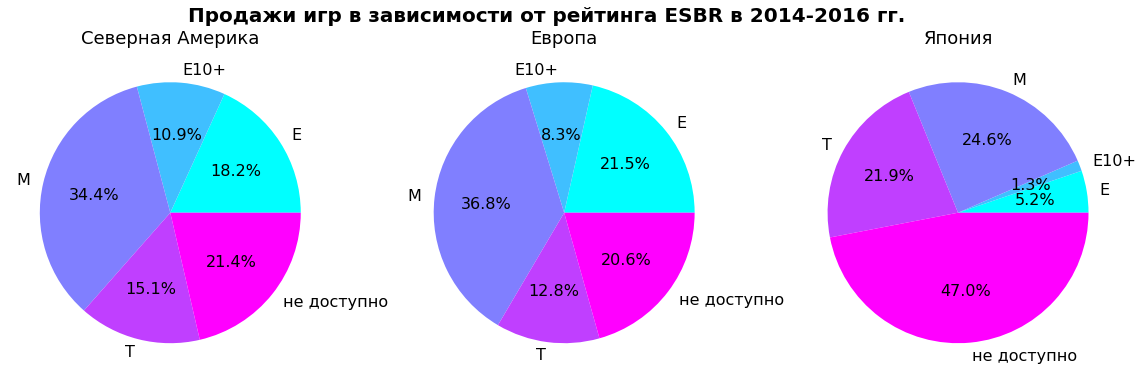

In [ ]:
#построим круговые диаграммы для каждого региона
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))#1 ряд, 3 диаграммы

rating_na.plot(kind='pie', ax=ax1, subplots=True, autopct='%1.1f%%', fontsize=16, cmap='cool')
ax1.set_title('Северная Америка', fontsize=18)
ax1.set_ylabel('')

rating_eu.plot(kind='pie', ax=ax2, subplots=True, autopct='%1.1f%%', fontsize=16, cmap='cool')
ax2.set_title('Европа', fontsize=18)
ax2.set_ylabel('')

rating_jp.plot(kind='pie', ax=ax3, subplots=True, autopct='%1.1f%%', fontsize=16, cmap='cool')
ax3.set_title('Япония', fontsize=18)
ax3.set_ylabel('')

plt.suptitle('Продажи игр в зависимости от рейтинга ESBR в 2014-2016 гг.', fontsize=20, fontweight='bold')

По диаграммам видно, что в Америке и Европе больше всего продается игр с рейтингм М (старше 17 лет),тогда как в Японии почти половина (47%) игр продается без возрастного рейтинга. В Америке и Европе без рейтинга продается ок. 20%. За ним следуют игры с маркировкой Т (тинейджер) - 15% и 13% соответственно. В Японии на эту долю приходится 22%. Следом идет маркировка Е (для всех). В Америке и Европе на этот рейтинг приходится 18% и 21% соотвественно. В Японии на продажи игр с этим рейтингом приходится всего 5%. На долю Е10+ приходится меньше всего продаж во всех трех регионах - 10%, 8% и 1% соответственно. 

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Рейтинг ESRB - это американский рейтинг, а в Японии есть своё рейтинговое агентство. Получается, что Япония страна со своим менталитетом. И твой анализ показывает, что Японцы в игры-то играют не такие, как весь прочий мир и жанры игр там популярны совсем другие, нежели в остальном мире, да и на рейтинги (не своего агентства) не очень то внимание обращают.</div>


### Вывод 4.

В этом разделе мы:
- определили для пользователя каждого региона самые популярные платформы. Мы построили круговые диаграммы для всех регионов и определили, что самая популярная платформа для всех регионов - PS4. На нее приходятся 65%, 75% и 57% продаж в каждом регионе соответственно. Это понятно, ведь предыдущий анализ показал, что эта платформа самая новая, а потому самая перспективная из всех. X360 более популярна в Америке, чем в Европе, она занимает 18% и 9% в этих регионах соответственно. В Японии игр этой платформы продается ничтожно мало - меньше 0.1%. На PS3 приходится примерно равное количество продаж в Америке и Европе (ок. 15%), а вот в Японии эта платформа на втором месте по популярности после PS4. Wii занимает ничтожную долю рынка в Америке и Европе, в то время, как в Японии она не представлена вовсе.
- Определили самые популярные жанры. Для этого также построили круговые диаграммы и выяснили, что вкусы североамериканских и европейских игроков довольно похожи. Приблизительно одинаковые доли для этих регионов приходятся на жанры (в порядке убывания) Action, Shooter, Sports и Role-Playing. Пятое место в Европе занимает Racing, тогда как в Америке этого жанра нет в топ-5. Здесь на последнем месте игры, не вошедшие в другие категории. У японцев вкусы заметно отличаются от американских и европейских: не первом месте здесь тоже Action, как и в других двух регионах, а второе место занимает Role-Playing c 25%, тогда как в Америке и Европе этот жанр занимает лишь 4-е. На 3-ем Shooter с 13%, на 4-м Fighting, жанр вообще не представленный в топ-5 в Америке и Европе. И на последнем -- Sports c 8%, тогда как в Америке и Европе этот жанр занимает 3-ю позицию с 23% в обоих регионах.
- выяснили, влияет ли рейтинг ESRB на продажи в отдельном регионе. На основе построенных диаграм нашли, что в Северной Америке и Европе больше всего продается игр с рейтингм М (старше 17 лет),тогда как в Японии почти половина (47%) игр продается без возрастного рейтинга. В Америке и Европе без рейтинга продается ок. 20%. За ним следуют игры с маркировкой Т (тинейджер) - 15% и 13% соответственно. В Японии на эту долю приходится 22%. Следом идет маркировка Е (для всех). В Америке и Европе на этот рейтинг приходится 18% и 21% соотвественно. В Японии на продажи игр с этим рейтингом приходится всего 5%. На долю Е10+ приходится меньше всего продаж во всех трех регионах - 10%, 8% и 1% соответственно.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отличный вывод.</div>

## Проверка гипотез

#### Шаг 5.1 Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Для сравнения средних значений двух генеральных совокупностей применим специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var) . Методу передают параметры: array1, array2 — массивы, содержащие выборки; equal_var (от англ. equal variance — «равная дисперсия») — необязательный параметр, задающий, считать ли равными дисперсии выборок.

Таким образом, нулевая гипотеза будет звучать так: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Альтернативная -- средние пользовательские рейтинги платформ Xbox One и PC разные.

In [ ]:
#отфильтрует платформы XOne и PC по актуальному периоду
df_xone = df.query('platform == "XOne" and year_of_release >= 2014 and user_score != -1')
df_pc = df.query('platform == "PC" and year_of_release >= 2014 and user_score != -1')

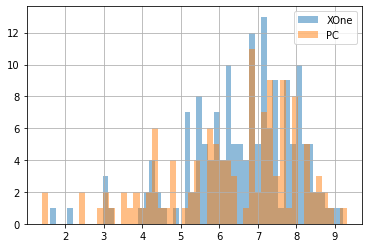

In [ ]:
#построим гистограммы чтобы посмотреть на распределения
df_xone['user_score'].hist(bins=50, alpha=0.5, label='XOne')
df_pc['user_score'].hist(bins=50, alpha=0.5, label='PC')
plt.legend()

Датасеты немного скошены влево

In [ ]:
#найдем уникальные значения наших выборок
df_xone['user_score'].nunique()

50

In [ ]:
#найдем уникальные значения наших выборок
df_pc['user_score'].nunique()

51

In [ ]:
#найдем дисперсии
df_xone_var = np.var(df_xone['user_score'])
df_xone_var

1.8795460055096425

In [ ]:
df_pc_var = np.var(df_pc['user_score'])
df_pc_var

2.8773743617307175

Размер выборок практически одинаковый, дисперсии не сильно разнятся, поэтому не будем применять параметр equal_var=False

In [ ]:
from scipy import stats as st

alpha = .01 # критический уровень статистической значимости
#если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(df_xone['user_score'], df_pc['user_score'])
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Итак, мы не можем отвергнуть нашу гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.



#### Шаг 5.2 Проверим гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.


Здесь нулевая гипотеза будет звучать так: средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная будет противоположна нулевой: средние пользовательские рейтинги жанров Action и Sports разные.

In [ ]:
#отфильтруем наш датасет по жанру и значениям user_score не равным -1
action = df_final.query('genre == "Action" and user_score != -1')

In [ ]:
sports = df_final.query('genre == "Sports" and user_score != -1')

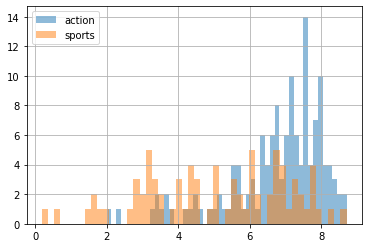

In [ ]:
#построим гистограммы чтобы посмотреть на распределения
action['user_score'].hist(bins=50, alpha=0.5, label='action')
sports['user_score'].hist(bins=50, alpha=0.5, label='sports')
plt.legend()

У action датасет скошен влево, а у sports нормальное распределение.

In [ ]:
#найдем уникальные значения
action['user_score'].nunique()

48

In [ ]:
sports['user_score'].nunique()

53

Выборки более или менее равны

In [ ]:
#найдем дисперсии
action_var = np.var(action['user_score'])
action_var

1.8118756563747112

In [ ]:
sports_var = np.var(sports['user_score'])
sports_var

3.8843486620733843

Выборки почти одинаковые, но дисперсии различаются, поэтому при вызове метода scipy.stats.ttest_ind() укажем параметр equal_var как False 

In [ ]:
alpha = .01 # критический уровень статистической значимости
#если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.533200351910872e-10
Отвергаем нулевую гипотезу


In [ ]:
#вызовем метод describe
action['user_score'].describe()

count    138.000000
mean       6.736232
std        1.350963
min        2.000000
25%        6.225000
50%        7.100000
75%        7.700000
max        8.700000
Name: user_score, dtype: float64

In [ ]:
sports['user_score'].describe()

count    79.000000
mean      5.063291
std       1.983469
min       0.200000
25%       3.400000
50%       5.100000
75%       6.800000
max       8.700000
Name: user_score, dtype: float64

Видим, что средние значения жанров Action и Sports довольно сильно отличаются.

Отвергаем нулевую гипотезу, а значит не можем отвергнуть гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.

 ### Вывод 5.

В этом разделе мы проверили две гипотезы:
- "средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
- "средние пользовательские рейтинги жанров Action и Sports разные".

Пришли к выводу, что обе гипотезы отбросить нельзя.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

В разделе проверки гипотез всё хорошо.</div>

## Общий вывод

Мы получили таблицу, в которой 11 столбцов и 16 714 строк. В данных обнаружили пропуски, нарушения стиля в названиях столбцов, неверные типы данных, странное обозначение tbd в User_Score. 

В ходе предобработки данных мы:
- перевели названия столбцов в нижний регистр;
- удалили пропуски в стобцах year_of_release', 'genre', 'name';
- перевели столбец "год выпуска" в целочисленный тип, а "рейтинг пользователей" в тип float;
- нашли долю пропусков в critic_score, user_score, rating;
- заменили пропуски critic_score, user_score на "-1", "tbd" в user_score также заменили на "-1". В столбце с рейтингом пропупуски заменили на "не доступно".

Далее произвели исследовательский анализ данных:
 - мы изучили, сколько игр выпускалось за разные годы и выяснили, что больше всего игр выпускалось в 2008 и 2009 годах. В период до 1995 года выходило очень мало игр. 
 - изучили, как менялись продажи по платформам. Выбрали топ-7 платформ с наибольшими суммарными продажами и построили распределение по годам. Выяснили, что средняя жизнь платформы - 10 лет. Выбрали актуальный период 2014-2016 годы.
 - построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Выяснили, что медианные продажи для всех платформ составляют ок. 200 тыс. копий в год (кроме PS3, жизненный цикл которой завершается). Выбросы говорят о небольшом количестве игр с очень большими продажами, которые и определяют лидирующие позицию этих платформ на рынке. Особенно много таких успешных игр у PS4.
 - посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами и выяснили, что связи между оценками пользователей и продажами игр практически нет. Коэф. корреляции низкий - 0.15. В то время, как связь между продажами и оценками экспертов для всех платформ является прямой, средней степени выраженности (коэффициент 0,44).
 - нашли коэффициенты корреляции по продажам игр и отзывам на других платформах, кроме PS3 и обнаружили, что по остальным 3 топ-платформам коэффициенты корреляции немного отличаются от одной PS3. Здесь видно, что связь между оценками пользователей и продажами еще меньше. Коэф.корреляции незначительный -- -0.01, что говорит о низкой степени выраженности. Коэф.корреляции для оценки критиков -- 0.39. Это значение чуть меньше, чем для одной платформы PS3, т.е связь  между продажами и оценками экспертов для всех платформ является прямой, средней степени выраженности. 
 - посмотрели на общее распределение игр по жанрам и нашли, что самые прибыльные -- это игры с жанрами Shooter, Sports и Simulation.

После этого составили портрет пользователя каждого региона:
- определили для пользователя каждого региона самые популярные платформы. Мы построили круговые диаграммы для всех регионов и определили, что самая популярная платформа для всех регионов - PS4. На нее приходятся 65%, 75% и 57% продаж в каждом регионе соответственно. Это понятно, ведь предыдущий анализ показал, что эта платформа самая новая, а потому самая перспективная из всех. X360 более популярна в Америке, чем в Европе, она занимает 18% и 9% в этих регионах соответственно. В Японии игр этой платформы продается ничтожно мало - меньше 0.1%. На PS3 приходится примерно равное количество продаж в Америке и Европе (ок. 15%), а вот в Японии эта платформа на втором месте по популярности после PS4. Wii занимает ничтожную долю рынка в Америке и Европе, в то время, как в Японии она не представлена вовсе.
- Определили самые популярные жанры. Для этого также построили круговые диаграммы и выяснили, что вкусы североамериканских и европейских игроков довольно похожи. Приблизительно одинаковые доли для этих регионов приходятся на жанры (в порядке убывания) Action, Shooter, Sports и Role-Playing. Пятое место в Европе занимает Racing, тогда как в Америке этого жанра нет в топ-5. Здесь на последнем месте игры, не вошедшие в другие категории. У японцев вкусы заметно отличаются от американских и европейских: не первом месте здесь тоже Action, как и в других двух регионах, а второе место занимает Role-Playing c 25%, тогда как в Америке и Европе этот жанр занимает лишь 4-е место. На 3-м Shooter с 13%, на 4-м Fighting, жанр вообще не представленный в топ-5 в Америке и Европе. И на последнем -- Sports c 8%, тогда как в Америке и Европе этот жанр занимает 3-ю позицию с 23% в обоих регионах.
- выяснили, влияет ли рейтинг ESRB на продажи в отдельном регионе. На основе построенных диаграм нашли, что в Северной Америке и Европе больше всего продается игр с рейтингм М (старше 17 лет),тогда как в Японии почти половина (47%) игр продается без возрастного рейтинга. В Америке и Европе без рейтинга продается ок. 20%. За ним следуют игры с маркировкой Т (тинейджер) - 15% и 13% соответственно. В Японии на эту долю приходится 22%. Следом идет маркировка Е (для всех). В Америке и Европе на этот рейтинг приходится 18% и 21% соотвественно. В Японии на продажи игр с этим рейтингом приходится всего 5%. На долю Е10+ приходится меньше всего продаж во всех трех регионах - 10%, 8% и 1% соответственно.

Наконец, мы проверили две гипотезы:
- "средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
- "средние пользовательские рейтинги жанров Action и Sports разные".

И пришли к выводу, что обе гипотезы отбросить нельзя.


# Результат ревью:

Елена, я отмечаю высокий уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python и библиотеки pandas (метод .loc, векторизацию, цепочку методов (chain rules)). Всё это в целом упрощает твой код и одновременно показывает твой уровень владения инструментами.

Ты умело применяешь графические библиотеки (matplotlib), выбираешь для визуализации ровно те типы графиков, которые нужны. Очень хорошо, что оси на графиках подписаны и сами они имеют понятные названия.

С комментированием тоже никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей. Ссылки из брифа проекта в нужных местах также помогают следовать за развитием событий и дают полную информацию касаемо того, что будет происходить в том или ином разделе проекта.

Мне было просто проверять твой проект, потому что ты чётко структурировала его, используя оглавление. Спасибо.

Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

Жёлтым цветом я выделил то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

И всего один момент, которые не позволяет мне принять твой проект в его нынешнем состоянии:

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b> 

1. По условию проекта надо сравнить результаты PS3 с результатами на других консолях. Но ты сравниваешь PS3 со всеми прочими  консолями. Это не соответствует условию.</div>

Этот момент требует твоего внимания. Он помечен красным цветом. После его исправления твой проект будет принят.
 
Подводя итог: отличная работа на самом-то деле, молодец! Всего 1 момент к исправлению, но уверен, что он не вызовет у тебя вообще никаких сложностей. Присылай проект проекта на повторное ревью.